In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/Original'
classes = ['Benign', 'Early', 'Pre', 'Pro']


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

classes = ['Benign', 'Early', 'Pre', 'Pro']
data_dir = dataset_path

image_paths = []
labels = []

for cls in classes:
    cls_folder = os.path.join(data_dir, cls)

    if cls == 'Benign':

        folder_to_load = os.path.join(cls_folder, 'augmented')
    else:
        folder_to_load = cls_folder

    for fname in os.listdir(folder_to_load):
        if fname.endswith(".jpg"):
            image_paths.append(os.path.join(folder_to_load, fname))
            labels.append(cls)


In [ ]:
img_size = (224, 224)

def load_images(paths, size):
  images = []
  for path in paths:
    img = Image.open(path).resize(size)
    images.append(np.array(img))
  return np.array(images)

X = load_images(image_paths, img_size)
X = vgg_preprocess(np.array(X))

le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2921, 224, 224, 3)
Test shape: (731, 224, 224, 3)


In [ ]:
from collections import Counter
print(Counter(labels))

Counter({'Early': 985, 'Pre': 963, 'Benign': 900, 'Pro': 804})


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 21,138,500 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=50,
    callbacks=[early_stop]
)

model_save_path = '/content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/vgg_augmented_model.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")



Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 577ms/step - accuracy: 0.2791 - loss: 7.0285 - val_accuracy: 0.4733 - val_loss: 1.4489
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.3932 - loss: 2.4945 - val_accuracy: 0.5663 - val_loss: 1.0132
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - accuracy: 0.4493 - loss: 1.7270 - val_accuracy: 0.6648 - val_loss: 0.8221
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 262ms/step - accuracy: 0.5119 - loss: 1.3625 - val_accuracy: 0.7209 - val_loss: 0.6992
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.6130 - loss: 1.0593 - val_accuracy: 0.7798 - val_loss: 0.5821
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.6371 - loss: 0.9524 - val_accuracy: 0.8194 - val_loss: 0.4921
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.6929 - loss: 0.7769 - val_accuracy: 0.8550 - val_loss: 0.4174
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.7529 - loss: 0.6619 - val_accu

✅ Model saved to: /content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/vgg_augmented_model.h5


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9957 - loss: 0.0215
Test Accuracy: 0.9932


In [ ]:
model.save('vgg16_model.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9957 - loss: 0.0215
Test Accuracy: 0.9932
Test Loss: 0.0305


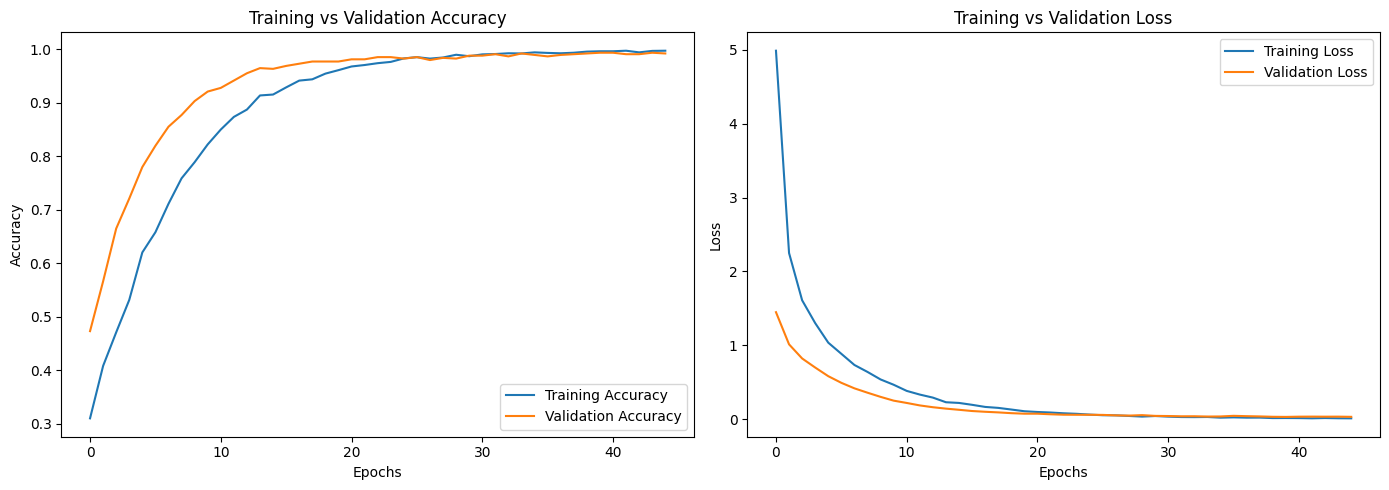

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_labels, target_names=le.classes_))

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       180
       Early       0.99      0.98      0.99       197
         Pre       1.00      0.99      1.00       193
         Pro       1.00      1.00      1.00       161

    accuracy                           0.99       731
   macro avg       0.99      0.99      0.99       731
weighted avg       0.99      0.99      0.99       731



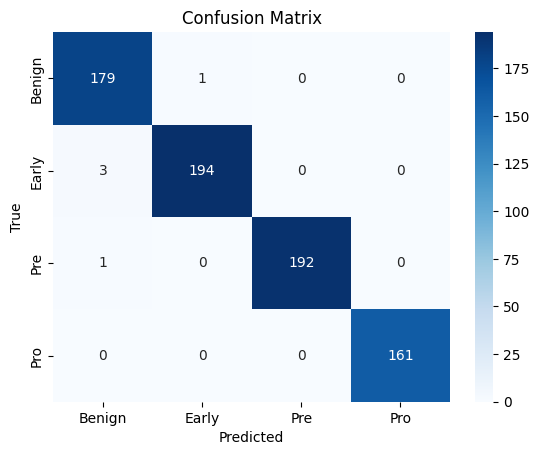

In [ ]:
cm = confusion_matrix(y_true, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('resnet50_confusion_matrix.png', dpi=300)
plt.show()

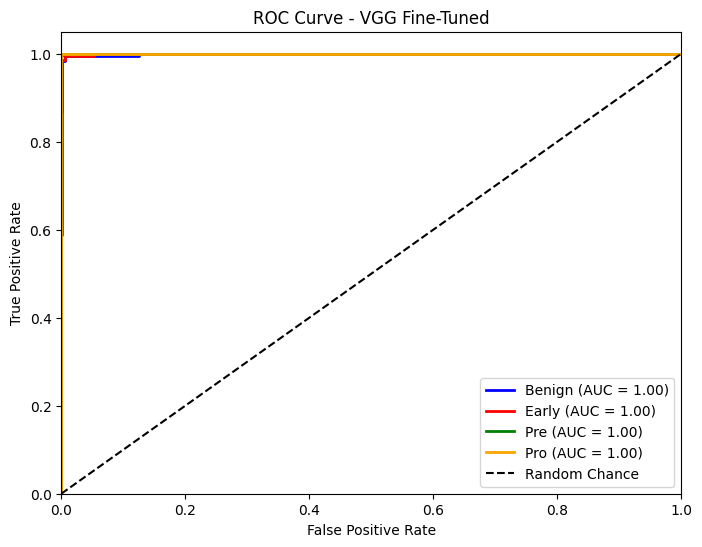

In [ ]:
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']

for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - VGG Fine-Tuned')
plt.legend(loc='lower right')
plt.savefig('resnet50_roc_curve.png', dpi=300)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from IPython.display import Image, display
from tensorflow.keras.models import load_model


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/vgg_augmented_model.h5')
model.layers[-1].activation = None


In [ ]:
img_path = '/content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/Original/Pro/WBC-Malignant-Pro-001.jpg'  # Replace with actual image
img_size = (224, 224)
last_conv_layer_name = 'block5_pool'

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


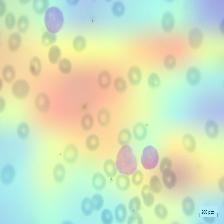

In [ ]:
"""
Grad-CAM Algorithm adapted from: https://keras.io/examples/vision/grad_cam/
"""

def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    array = tf.keras.applications.resnet50.preprocess_input(array)
    return np.expand_dims(array, axis=0)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_output = last_conv_output[0]
    heatmap = last_conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = load_img(img_path)
    img = img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    display(Image(cam_path))

img_array = get_img_array(img_path, img_size)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

save_and_display_gradcam(img_path, heatmap)

In [ ]:
img_size = (224, 224)
last_conv_layer_name = 'block5_conv3'
class_labels = le.classes_



In [ ]:
def generate_and_display_gradcam(index, X_test, y_test):

    global correct_predictions

    original_img = X_test[index]
    img_array = preprocess_img_array(original_img)

    heatmap, preds = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    predicted_label_index = np.argmax(preds[0])
    predicted_label = class_labels[predicted_label_index]
    true_label_index = np.argmax(y_test[index])
    true_label = class_labels[true_label_index]

    if predicted_label_index == true_label_index:
      correct_predictions += 1

    gradcam_overlay = overlay_gradcam(original_img, heatmap)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].imshow(original_img.astype('uint8'))
    axs[0].set_title(f'Index: {index}\nTrue: {true_label}\nPredicted: {predicted_label}')
    axs[0].axis('off')

    axs[1].imshow(gradcam_overlay)
    axs[1].set_title(f'Grad-CAM Heatmap\nfor {predicted_label}')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import random
correct_predictions = 0

selected_indices = random.sample(range(len(X_test)), 15)

for idx in selected_indices:
    generate_and_display_gradcam(idx, X_test, y_test)

print(f"Total correct predictions out of 15 images: {correct_predictions}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import random

correct_predictions = 0

pro_indices = []
for i in range(len(X_test)):
    if np.argmax(y_test[i]) == np.where(class_labels == 'Pro')[0][0]:
        pro_indices.append(i)

selected_indices = random.sample(pro_indices, min(15, len(pro_indices)))

for idx in selected_indices:
    generate_and_display_gradcam(idx, X_test, y_test)

print(f"Total correct predictions out of {len(selected_indices)} Pro images: {correct_predictions}")


Output hidden; open in https://colab.research.google.com to view.